In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

In [2]:
x,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

(4, 1)
(4,)


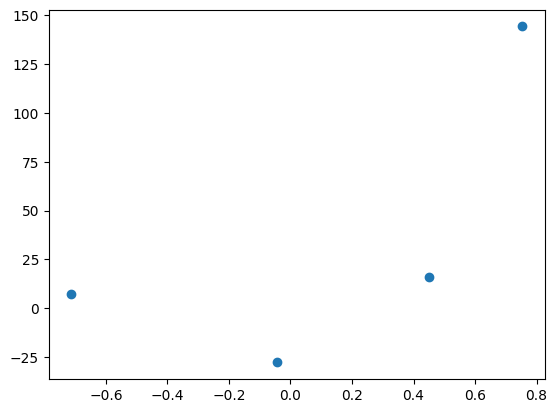

In [3]:
plt.scatter(x,y)
print(x.shape)
print(y.shape)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.20,random_state=42)

In [5]:
print(x_test.shape)
print(y_test.shape)

(1, 1)
(1,)


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [8]:
print(reg.coef_)
print(reg.intercept_)

[78.35063668]
26.15963284313262


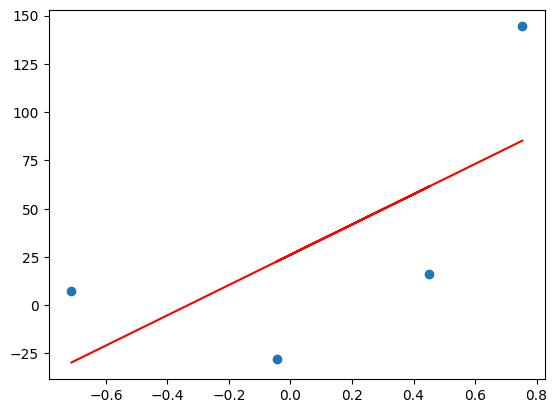

In [9]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

In [26]:
from sklearn.metrics import r2_score
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [12]:
class GDRegeressor:
    def __init__(self,learning_rate,epoch):
        self.m=78.8
        self.b=140
        self.lr=learning_rate
        self.epoch=epoch

    def fit(self,x,y):
        #calculate 
        for i in range(self.epoch):
            loss_slope=-2*np.sum(y-self.m*x.ravel()-self.b)
            self.b=self.b-(self.lr*loss_slope)
        print(self.b)

In [13]:
gd=GDRegeressor(0.01,100)

In [14]:
gd.fit(x,y)

26.136471225614663


## Batch Gradient Descent

In [15]:
#Tupes of Gradient Descent
# 1->Batch GD
# 2->Stochastic GD
# 3->Mini Batch GD

In [16]:
from sklearn.datasets import load_diabetes
X,y=load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [17]:
x_train,x_test,y_train,y_test=train_test_split(
    X,y,test_size=0.20,random_state=2)

In [18]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [20]:
y_pre=reg.predict(x_test)
r2_score(y_test,y_pre)

0.4399338661568968

In [43]:
class GDRegreaaion:

    def __init__(self,learning_rate=0.01,epoch=100):
        self.coef=None
        self.intercept_=None
        self.lr=learning_rate
        self.epoch=epoch
    def fit(self,x_train,y_train):
        #init your coefs
        self.intercept_=0
        #jitne coef witne col(x_train ka shape)
        self.coef_=np.ones(x_train.shape[1])

        for i in range(self.epoch):
            y_hat=np.dot(x_train,self.coef_)+self.intercept_
            intercept_der=-2*np.mean(y_train-y_hat)
            self.intercept_=self.intercept_-(self.lr*intercept_der)

            coef_der=-2*np.dot((y_train-y_hat),x_train)
            self.coef_=self.coef_-(self.lr*coef_der)
        print(self.intercept_,self.coef_)

    def Predict(self,x_test):
         return np.dot(x_test,self.coef_)+self.intercept_


In [53]:
gdr=GDRegreaaion(epoch=100,learning_rate=0.05)

In [72]:
import time
start=time.time()
gdr.fit(x_train,y_train)
print("time taken is ",time.time()-start)

151.90556065985143 [  -7.23334356 -201.99240472  533.15858837  339.609384    -83.03170432
 -105.1657575  -185.99419465   66.18080674  544.59090389   55.56900022]
time taken is  0.007919073104858398


In [55]:
y_pred=gdr.Predict(x_test)

In [56]:
r2=r2_score(y_test,y_pred)
r2

0.4438423971515759

## stochastic gradient descent

In [34]:
class SGDRegreaaion:

    def __init__(self,learning_rate=0.01,epoch=100):
        self.coef=None
        self.intercept_=None
        self.lr=learning_rate
        self.epoch=epoch
    def fit(self,x_train,y_train):
        #init your coefs
        self.intercept_=0
        #jitne coef witne col(x_train ka shape)
        self.coef_=np.ones(x_train.shape[1])

        for i in range(self.epoch):
            for j in range(x_train.shape[0]):
                idx=np.random.randint(0,x_train.shape[0])
            #idx wala row ko utho
                y_hat=np.dot(x_train[idx],self.coef_)+self.intercept_
                intercept_der=-2*(y_train[idx]-y_hat)
                self.intercept_=self.intercept_-(self.lr*intercept_der)
                coef_der=-2*np.dot((y_train[idx]-y_hat),x_train[idx])
                self.coef_=self.coef_-(self.lr*coef_der) 

        print(self.intercept_,self.coef_)

    def Predict(self,x_test):
         return np.dot(x_test,self.coef_)+self.intercept_


In [65]:
sgd=SGDRegreaaion(learning_rate=0.01,epoch=45)

In [73]:
import time
start=time.time()
sgd.fit(x_train,y_train)
print("time taken is ",time.time()-start)
#it has greater time than BGD
#but it work better in big data
#it moves from localminimum to global minimum

138.52365261596142 [  61.39715062  -50.84214835  328.29948034  246.86451379   20.50676305
  -22.79053361 -162.71033377  122.46417214  299.52081388  126.16518905]
time taken is  0.34674644470214844


In [74]:
y_pre=sgd.Predict(x_test)

In [75]:
r2_score(y_test,y_pre)

0.38968616588166016

## mini batch GD

In [81]:
import random
class MBGDRegreaaion:

    def __init__(self,batch_size,learning_rate=0.01,epoch=100):
        self.coef=None
        self.intercept_=None
        self.lr=learning_rate
        self.epoch=epoch
        self.batch_size=batch_size
    def fit(self,x_train,y_train):
        #init your coefs
        self.intercept_=0
        #jitne coef witne col(x_train ka shape)
        self.coef_=np.ones(x_train.shape[1])

        for i in range(self.epoch):
            for j in range(int(x_train.shape[0]/self.batch_size)):
                idx=random.sample(range(x_train.shape[0]),self.batch_size)
                y_hat=np.dot(x_train[idx],self.coef_)+self.intercept_
                intercept_der=-2*np.mean(y_train[idx]-y_hat)
                self.intercept_=self.intercept_-(self.lr*intercept_der)
                
                coef_der=-2*np.dot((y_train[idx]-y_hat),x_train[idx])
                self.coef_=self.coef_-(self.lr*coef_der)
        print(self.intercept_,self.coef_)

    def Predict(self,x_test):
         return np.dot(x_test,self.coef_)+self.intercept_


In [122]:
mbgd=MBGDRegreaaion(batch_size=int(x_train.shape[0]/50),learning_rate=0.05,epoch=20)

In [123]:
mbgd.fit(x_train,y_train)

156.9287715224422 [  23.34909011 -152.13694086  441.7314889   314.20956539  -37.70644643
 -105.36291982 -192.20318066  105.7819979   402.35519278  114.51149218]


In [124]:
y_prre=mbgd.Predict(x_test)

In [125]:
r2_score(y_test,y_prre)

0.4520340158034163

In [126]:
from sklearn.linear_model import SGDRegressor

In [133]:
sgd=SGDRegressor(learning_rate='constant',eta0=0.1)

In [134]:
batch_size=35
for i in range(100):
     idx=random.sample(range(x_train.shape[0]),batch_size)
     sgd.partial_fit(x_train[idx],y_train[idx])

In [135]:
sgd.coef_

array([  55.58981985,  -60.64727347,  351.41801397,  228.05239492,
         30.57980191,  -12.47434491, -185.97604447,  139.66191316,
        331.33534589,  126.66971133])

In [136]:
sgd.intercept_

array([161.69241447])

In [137]:
ypred=sgd.predict(x_test)

In [138]:
r2_score(y_test,ypred)

0.4132503454447376